<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [2]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


#### Install the required libraries and import them


In [3]:
!pip install pandas


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: C:\Users\Imane\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [4]:
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: C:\Users\Imane\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [6]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [10]:
QUERY = """
SELECT CompTotal, COUNT(*) as count 
FROM main 
GROUP BY CompTotal
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

          CompTotal  count
0               NaN  31697
1      0.000000e+00    127
2      1.000000e+00     12
3      2.000000e+00      4
4      3.000000e+00      1
...             ...    ...
3333   8.000000e+27      1
3334   1.000000e+44      1
3335   1.000000e+53      1
3336   1.000000e+65      1
3337  1.000000e+150      1

[3338 rows x 2 columns]


<Axes: xlabel='CompTotal', ylabel='Count'>

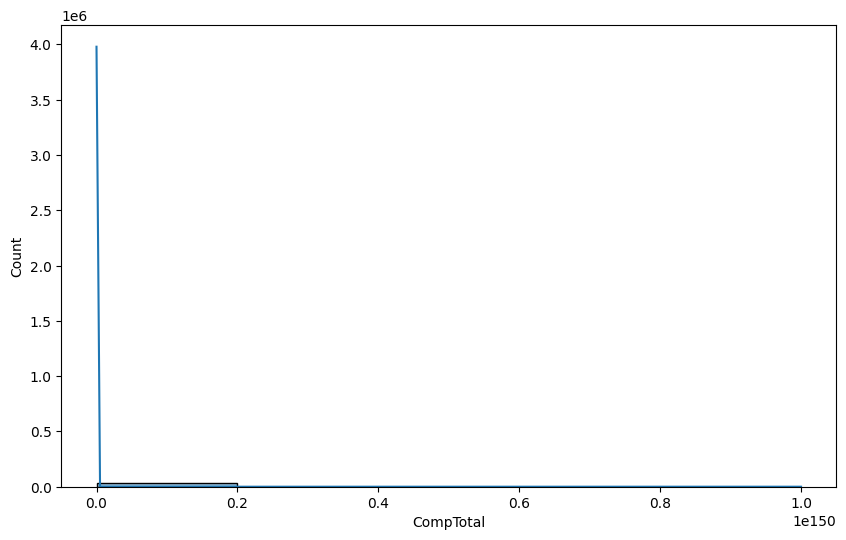

In [11]:
import seaborn as sns

QUERY = """
SELECT CompTotal 
FROM main
WHERE CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.histplot(df_comp['CompTotal'], bins=5, kde=True)

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


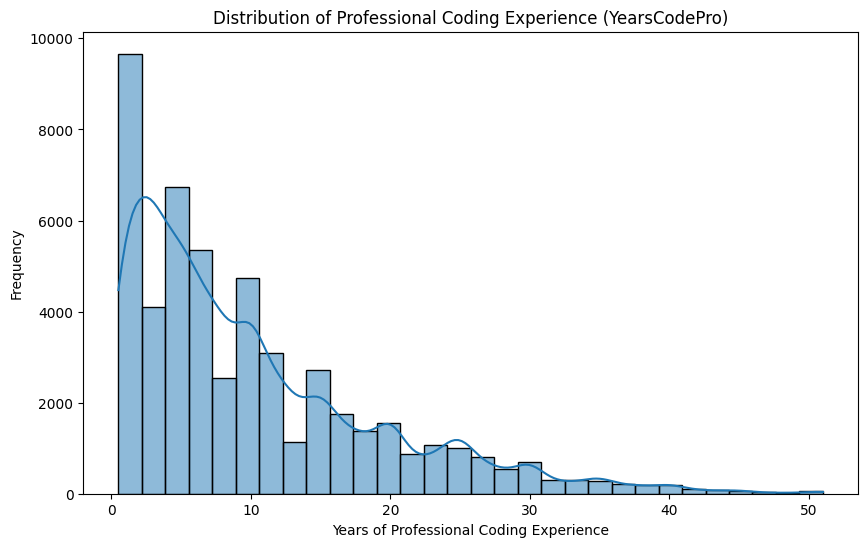

In [12]:
query = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""

df_years = pd.read_sql_query(query, conn)


def convert_years_code_pro(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df_years['YearsCodeProNumeric'] = df_years['YearsCodePro'].apply(convert_years_code_pro)
df_years = df_years.dropna(subset=['YearsCodeProNumeric'])

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df_years['YearsCodeProNumeric'], bins=30, kde=True)
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


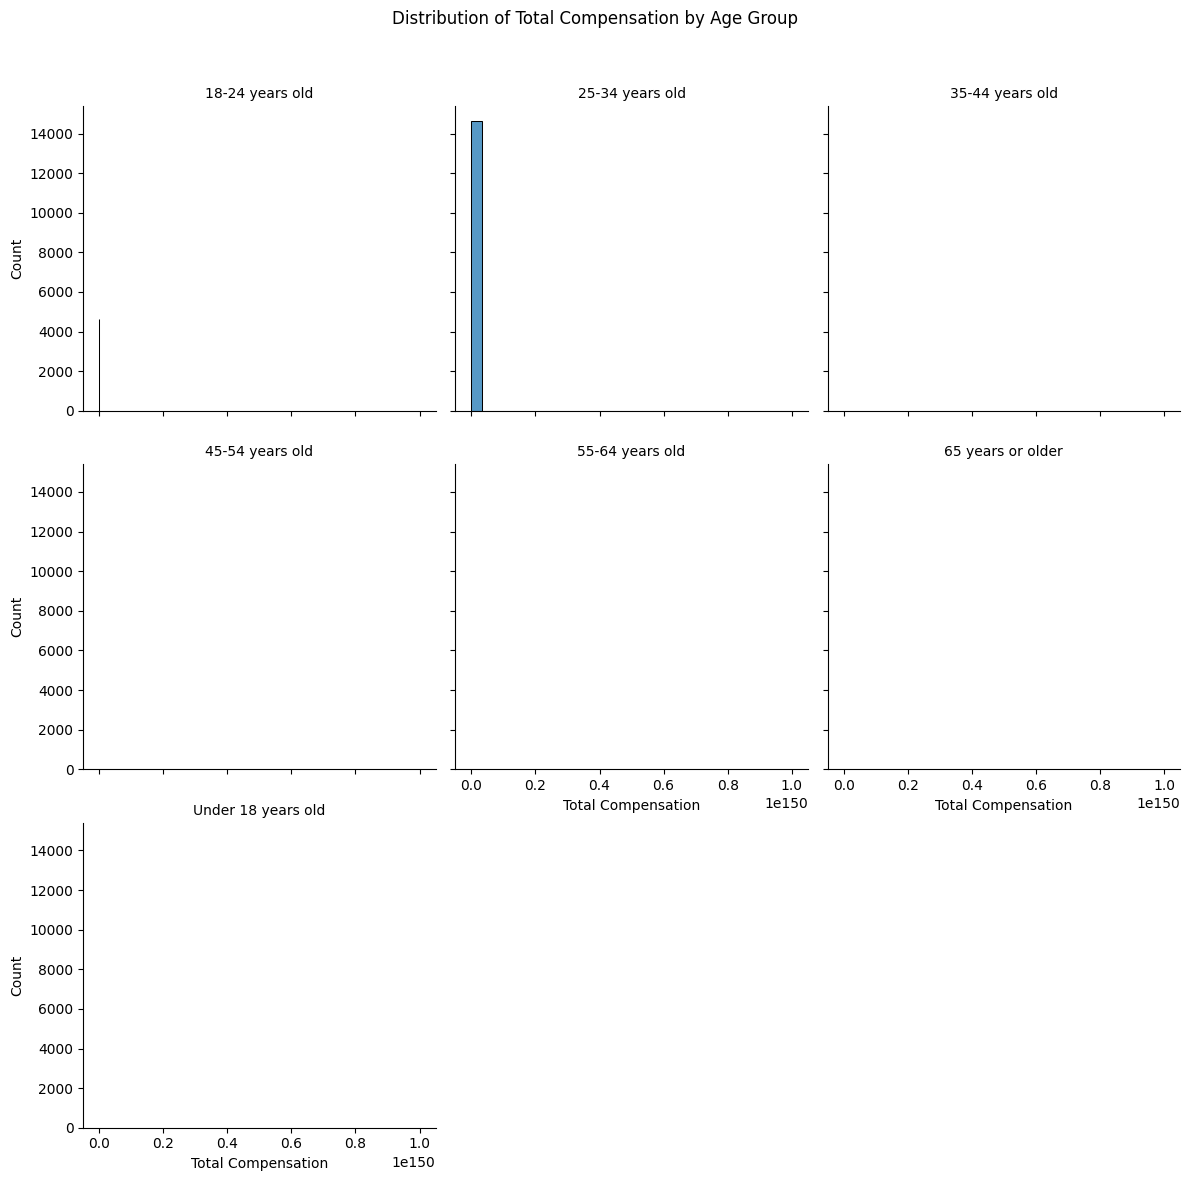

In [13]:
query = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
  AND Age IS NOT NULL
"""

df = pd.read_sql_query(query, conn)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Age'])

age_groups = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(age_groups)]

g = sns.FacetGrid(df, col="Age", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="CompTotal", bins=30, kde=False)
g.set_axis_labels("Total Compensation", "Count")
g.set_titles(col_template="{col_name}")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Total Compensation by Age Group')
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


C:\Users\Imane\AppData\Local\Temp\ipykernel_6924\1423576759.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_time.index, y=mean_time.values, palette='viridis')


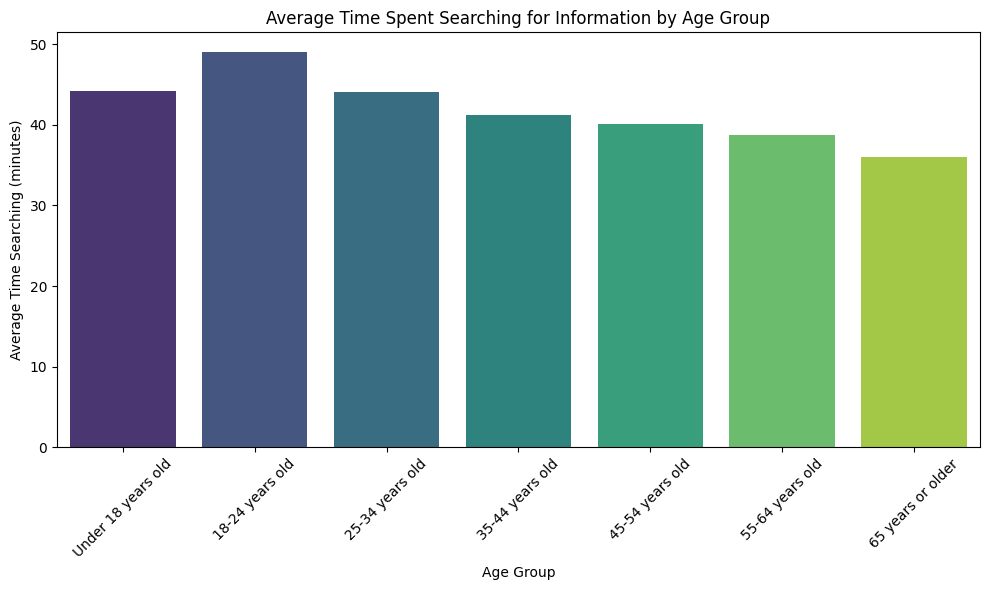

In [14]:
query = """
SELECT Age, TimeSearching
FROM main
WHERE TimeSearching IS NOT NULL
  AND Age IS NOT NULL
"""

df = pd.read_sql_query(query, conn)

time_map = {
    'Less than 15 minutes a day': 7,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}

df['TimeSearchingNumeric'] = df['TimeSearching'].map(time_map)
df = df.dropna(subset=['TimeSearchingNumeric', 'Age'])

age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df = df[df['Age'].isin(age_order)]

mean_time = df.groupby('Age')['TimeSearchingNumeric'].mean().reindex(age_order)

plt.figure(figsize=(10,6))
sns.barplot(x=mean_time.index, y=mean_time.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Average Time Searching (minutes)')
plt.title('Average Time Spent Searching for Information by Age Group')
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


C:\Users\Imane\AppData\Local\Temp\ipykernel_6924\2063249290.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, palette='Blues_d')


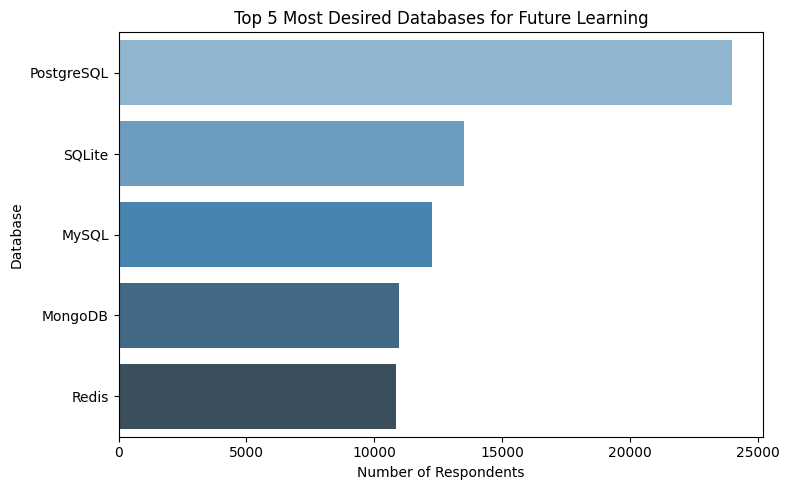

In [15]:
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df_expanded = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).to_frame('Database')
df_expanded['Database'] = df_expanded['Database'].str.strip()

top_5 = df_expanded['Database'].value_counts().head(5)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5.values, y=top_5.index, palette='Blues_d')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


C:\Users\Imane\AppData\Local\Temp\ipykernel_6924\1310700781.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index,palette='Set2')


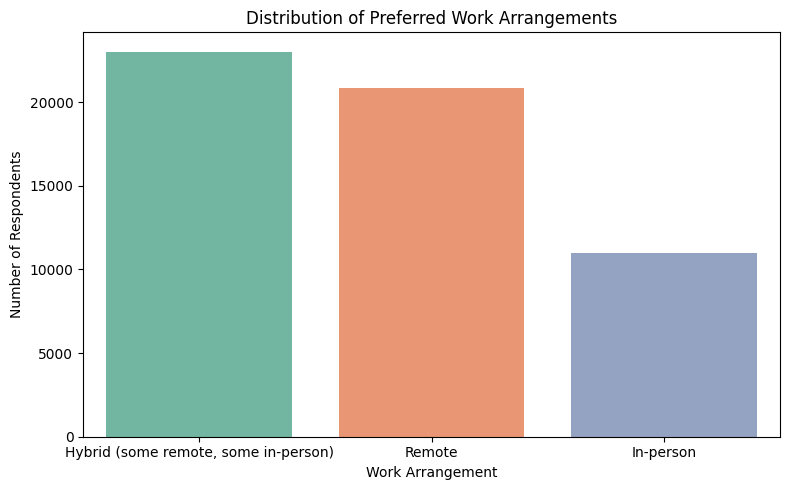

In [16]:
query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

print(df['RemoteWork'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index,palette='Set2')
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


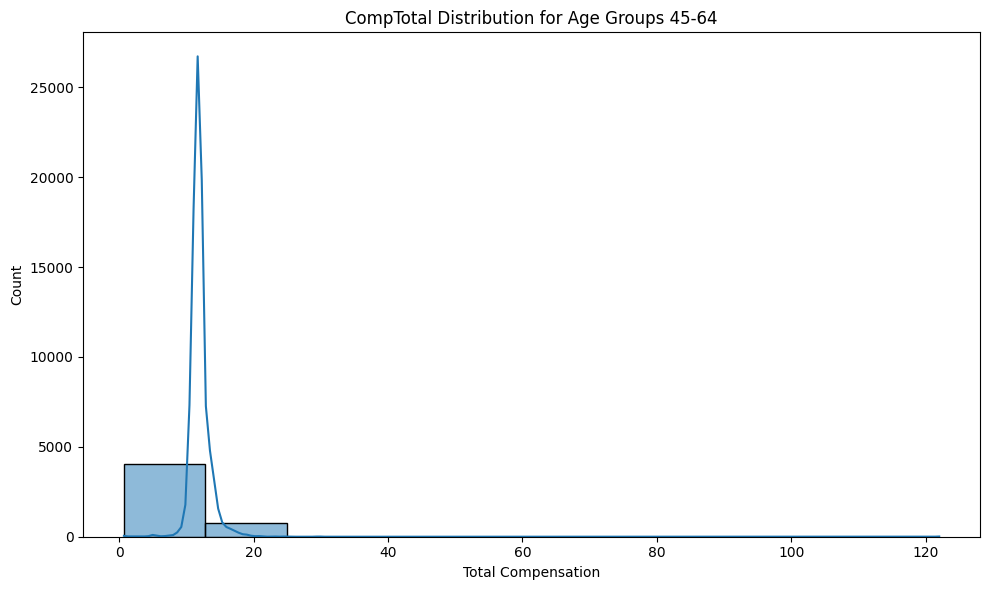

In [21]:
import numpy as np

age_groups = ("45-54 years old", "55-64 years old")

query = f"""
SELECT CompTotal
FROM main
WHERE Age IN {age_groups}
  AND CompTotal IS NOT NULL
"""

df = pd.read_sql_query(query, conn)

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['CompTotal'] = np.log1p(df['CompTotal'])  
df = df.dropna(subset=['CompTotal'])
df = df[df['CompTotal'] > 0]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['CompTotal'], bins=10, kde=True)
plt.title('CompTotal Distribution for Age Groups 45-64')
plt.xlabel('Total Compensation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


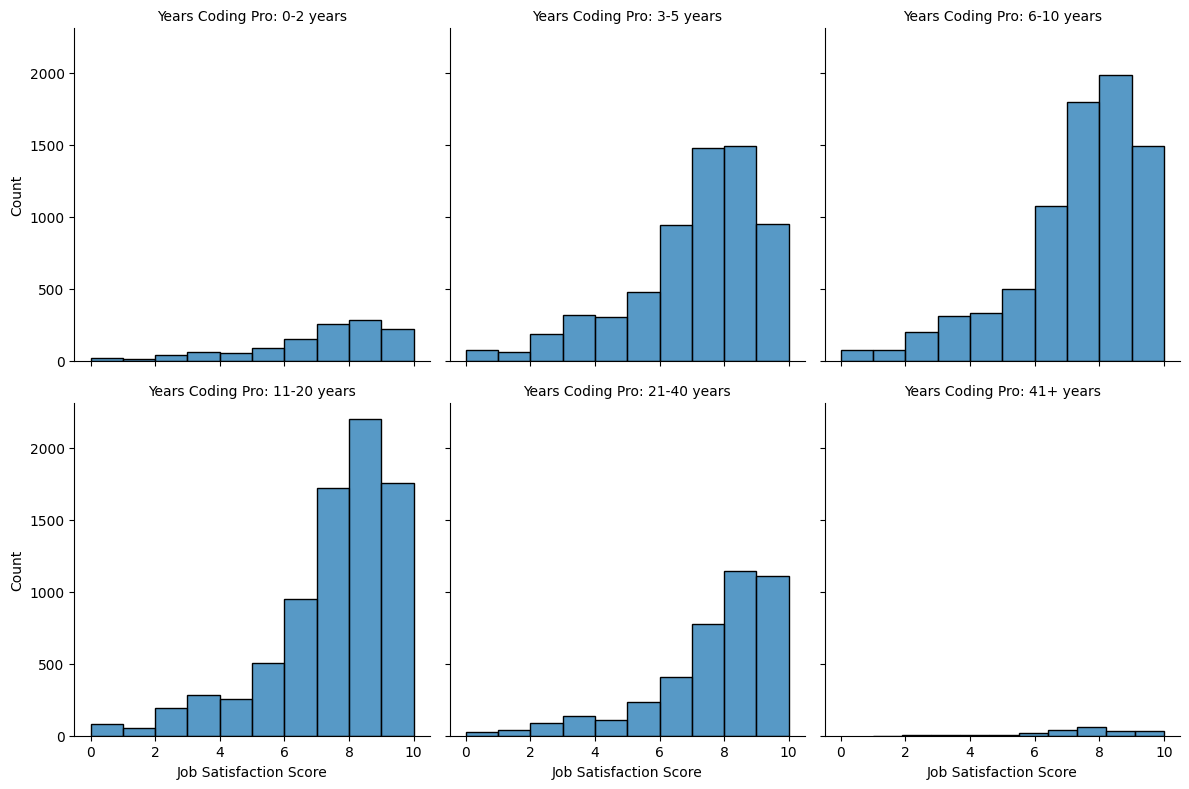

In [22]:
query = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL
  AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Convert to numeric (in case they are stored as strings)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing or invalid data
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Optional: create bins for YearsCodePro (coding experience)
bins = [0, 2, 5, 10, 20, 40, 60]
labels = ['0-2', '3-5', '6-10', '11-20', '21-40', '41+']
df['ExpGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Plot histogram of JobSat by coding experience groups using FacetGrid
g = sns.FacetGrid(df, col='ExpGroup', col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='JobSat', bins=10, kde=False)
g.set_axis_labels('Job Satisfaction Score', 'Count')
g.set_titles('Years Coding Pro: {col_name} years')
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [23]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
